In [150]:
# import statements:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [162]:
# calculates the time between each throw
def t(m_p):
    return 1.51*m_p

mu = 1376
sigma = 825
class Groundhog:
    def __init__(self):
        # calculates a random weight between 0, and then the avg rate per day (lmbda)
        self.m_p = np.random.randint(75,610)/1000
        self.lmbda = 3600/t(self.m_p)
        # calculates the lifespan; if distribution is negative, it is multiplied by -1 to make it positive
        generated_life = math.floor(np.random.normal(mu,sigma))
        self.lifespan = generated_life if generated_life>0 else generated_life*-1
        self.daily_throws = []
        self.daily_weight = []
    def simulate(self):
        for x in range(0,self.lifespan):
            count = np.random.poisson(self.lmbda)
            self.daily_throws.append(count)
            self.daily_weight.append(count*self.m_p)

In [187]:
my_groundhogs = [Groundhog() for x in range(0,10000)]
for groundhog in my_groundhogs:
    groundhog.simulate()

Text(0.5, 1.0, 'Distribution of 1000 Simulations')

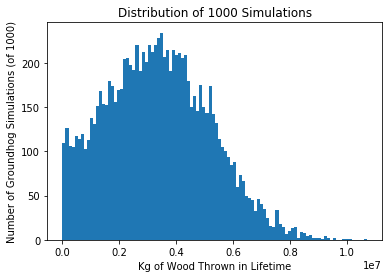

In [188]:
my_weights = [sum(x.daily_weight) for x in my_groundhogs]
plt.hist(my_weights,bins=100)
plt.xlabel("Kg of Wood Thrown in Lifetime")
plt.ylabel("Number of Groundhog Simulations (of 1000)")
plt.title("Distribution of 1000 Simulations")

Text(0.5, 1.0, 'Daily Weight Thrown by Simulated Groundhogs')

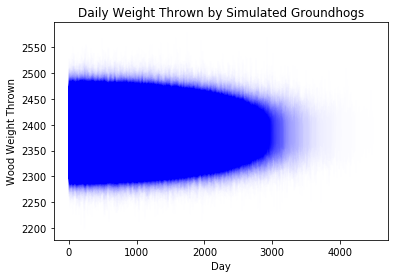

In [193]:
my_daily = [x.daily_weight for x in my_groundhogs] 
for x in my_daily:
    plt.plot(x, color="b", alpha=0.005)
    # plt.vlines(x[-1],max(x),0,color="y")
plt.xlabel("Day")
plt.ylabel("Wood Weight Thrown")
plt.title("Daily Weight Thrown by Simulated Groundhogs")

In [191]:
min([sum(x) for x in my_daily])

0